# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Sophia Imawaty AR]
- **Email:** [sophiaimawaty@gmail.com]
- **ID Dicoding:** [Sophia Imawaty AR]

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?
- Apa pola penyewaan sepeda berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
!pip freeze > requirements.txt

## Data Wrangling

### Gathering Data

In [20]:
# Pengumpulan data dari file CSV
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')

# Melihat beberapa baris pertama dari setiap dataset
print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Jumlah Peminjaman Harian: Data pada day_df memberikan informasi tentang total jumlah peminjaman sepeda per hari, memungkinkan analisis tren penggunaan sepeda di berbagai hari dalam setahun.
- Pola Peminjaman Per Jam: hour_df menyimpan data peminjaman per jam, yang dapat digunakan untuk mengidentifikasi jam-jam sibuk dan pola penggunaan sepeda di sepanjang hari, membantu dalam perencanaan layanan sepeda.

### Assessing Data

In [21]:
# Mengecek informasi dari dataset day
print(day_df.info())
print(day_df.describe())
print(day_df.isnull().sum())  # Mengecek apakah ada nilai yang hilang

# Mengecek informasi dari dataset hour
print(hour_df.info())
print(hour_df.describe())
print(hour_df.isnull().sum())  # Mengecek apakah ada nilai yang hilang

# Mengecek apakah ada data duplikat
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Insight:**
- Kelengkapan Data: Dengan memeriksa nilai yang hilang di kedua dataset day_df dan hour_df, Anda dapat menentukan kelengkapan dataset. Ini penting untuk memastikan analisis dan kesimpulan yang dapat diandalkan.
- Struktur dan Tipe Data: Output dari fungsi info() memberikan wawasan tentang tipe dan struktur data dalam dataset, yang membantu mengidentifikasi fitur kategorikal versus numerik, memungkinkan keputusan yang tepat tentang analisis dan visualisasi yang akan dilakukan.

### Cleaning Data

In [23]:
# Menghapus duplikat dari dataset day dan hour
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)
# Mengisi missing values dengan median pada kolom 'temp'
day_df['temp'].fillna(day_df['temp'].median(), inplace=True)
hour_df['temp'].fillna(hour_df['temp'].median(), inplace=True)
# Mengonversi kolom 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
# Menghapus outlier berdasarkan kolom 'cnt' yang lebih dari persentil 99
upper_bound_day = day_df['cnt'].quantile(0.99)
day_df = day_df[day_df['cnt'] <= upper_bound_day]

upper_bound_hour = hour_df['cnt'].quantile(0.99)
hour_df = hour_df[hour_df['cnt'] <= upper_bound_hour]

<ipython-input-23-37378aa4e6b3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df['temp'].fillna(day_df['temp'].median(), inplace=True)
<ipython-input-23-37378aa4e6b3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

**Insight:**
- Pembersihan Data: Penghapusan entri duplikat memastikan bahwa analisis didasarkan pada catatan yang unik, yang meningkatkan validitas hasil. Selain itu, mengisi nilai suhu yang hilang dengan median menjaga integritas data sambil mencegah analisis yang bias.
- Manajemen Outlier: Dengan menghilangkan outlier berdasarkan kolom cnt (jumlah penyewaan sepeda), dataset menjadi lebih representatif terhadap pola penggunaan yang khas. Langkah ini membantu mencegah nilai ekstrem mengganggu analisis dan visualisasi statistik, menghasilkan wawasan yang lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif - Dataset Day:
          instant                         dteday      season          yr  \
count  723.000000                            723  723.000000  723.000000   
mean   363.596127  2011-12-29 14:18:25.394190848    2.492393    0.495159   
min      1.000000            2011-01-01 00:00:00    1.000000    0.000000   
25%    181.500000            2011-06-30 12:00:00    1.500000    0.000000   
50%    362.000000            2011-12-28 00:00:00    2.000000    0.000000   
75%    544.500000            2012-06-27 12:00:00    3.000000    1.000000   
max    731.000000            2012-12-31 00:00:00    4.000000    1.000000   
std    210.969265                            NaN    1.114441    0.500323   

            mnth     holiday     weekday  workingday  weathersit        temp  \
count  723.00000  723.000000  723.000000  723.000000  723.000000  723.000000   
mean     6.50899    0.029046    2.979253    0.687414    1.398340    0.494039   
min      1.00000    0.000000    0.00000

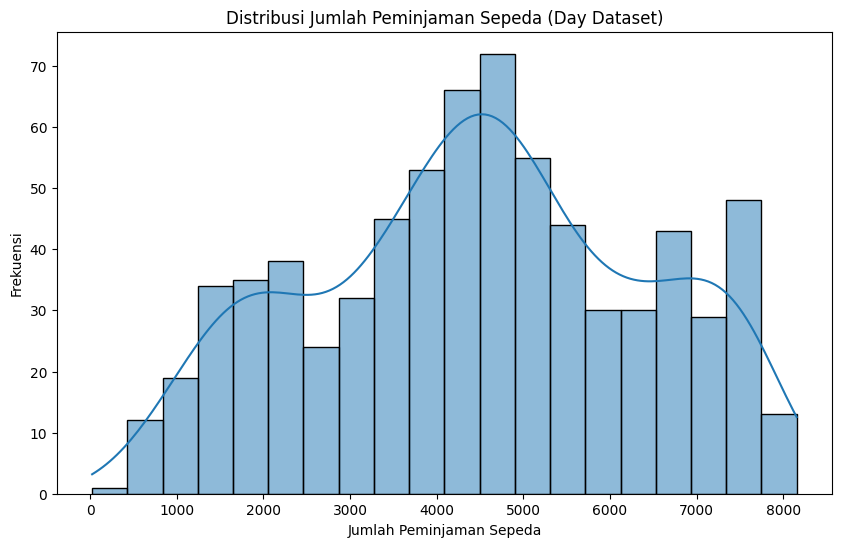

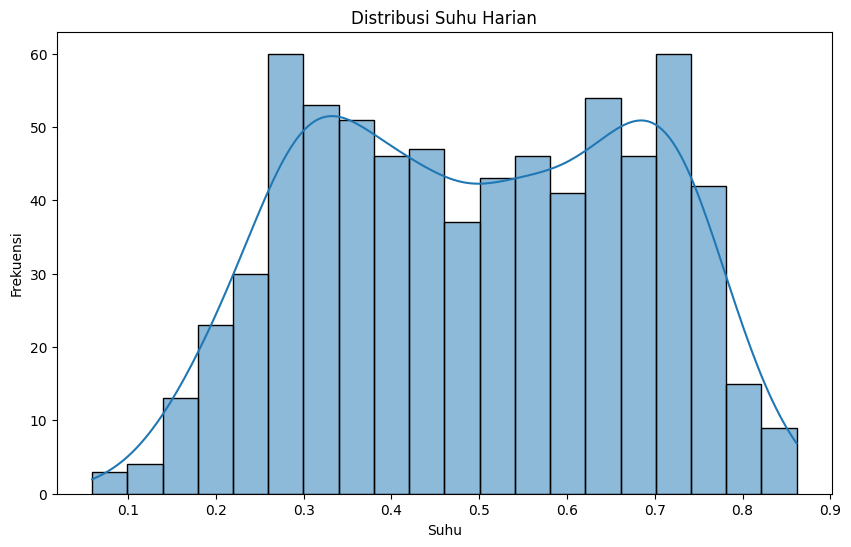

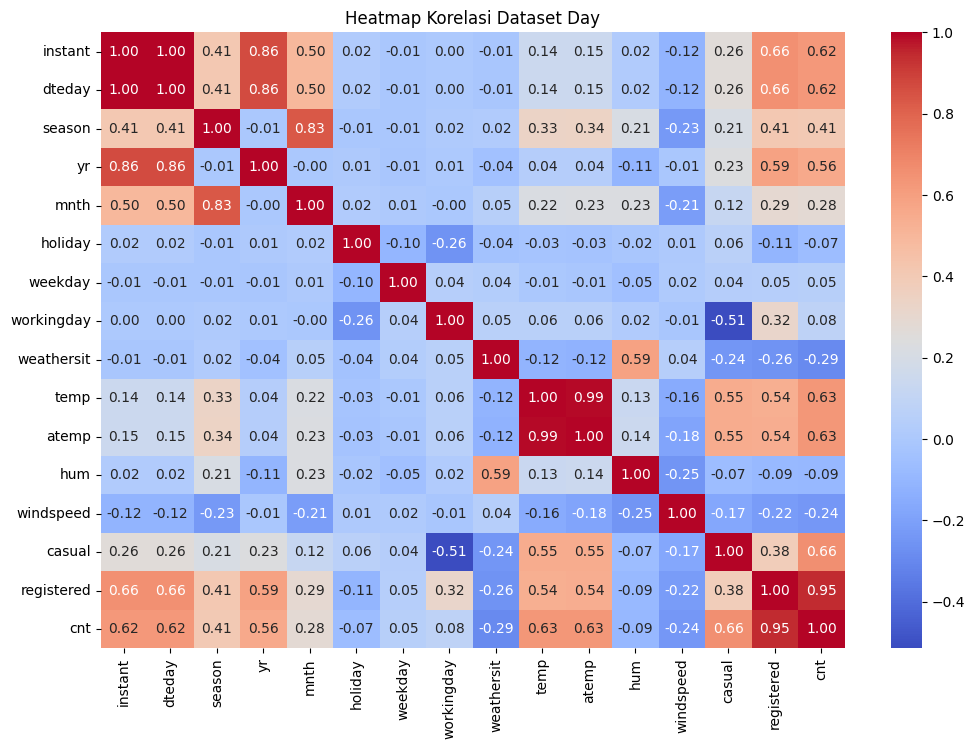

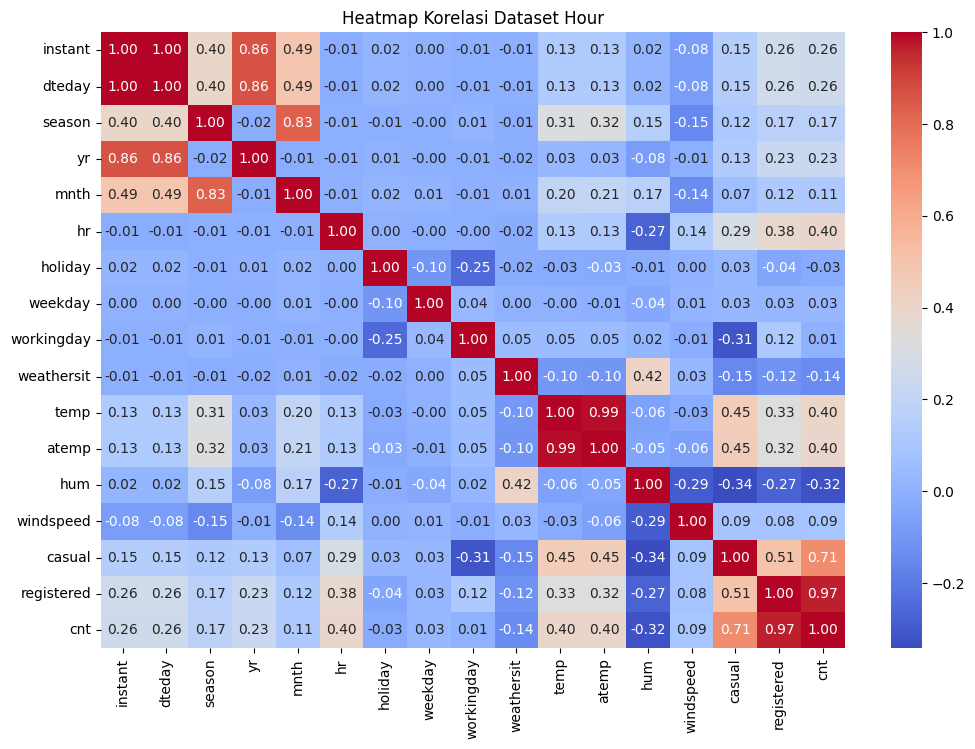

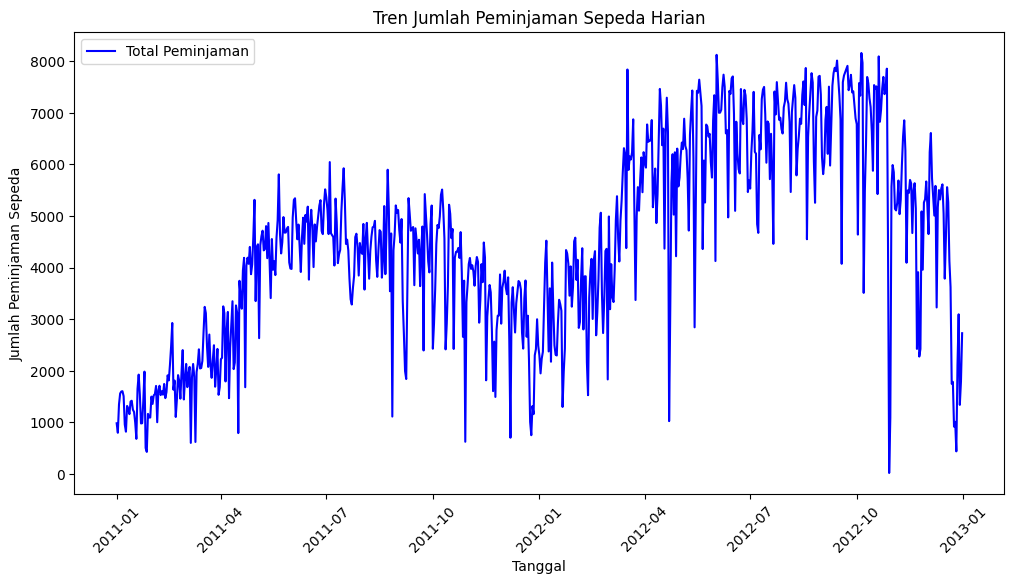

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

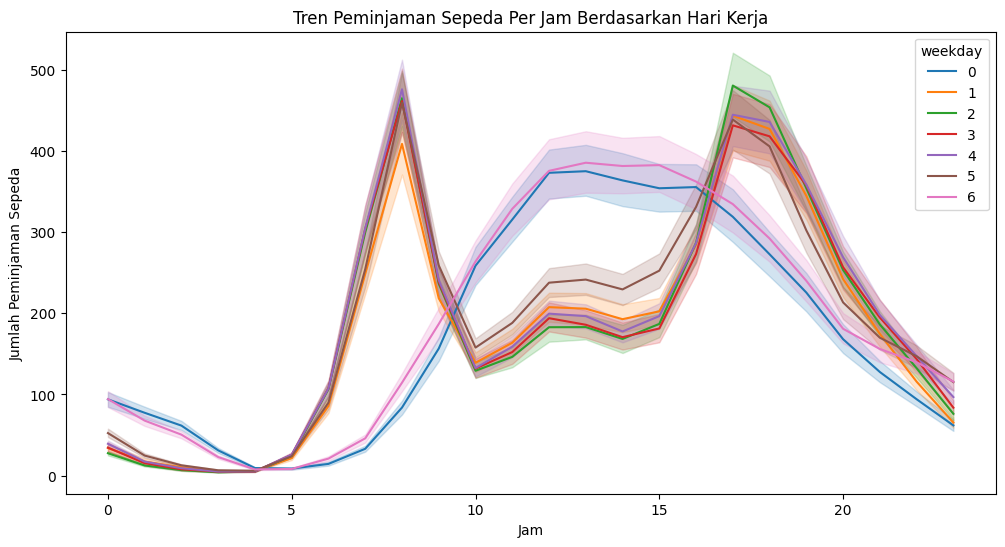

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


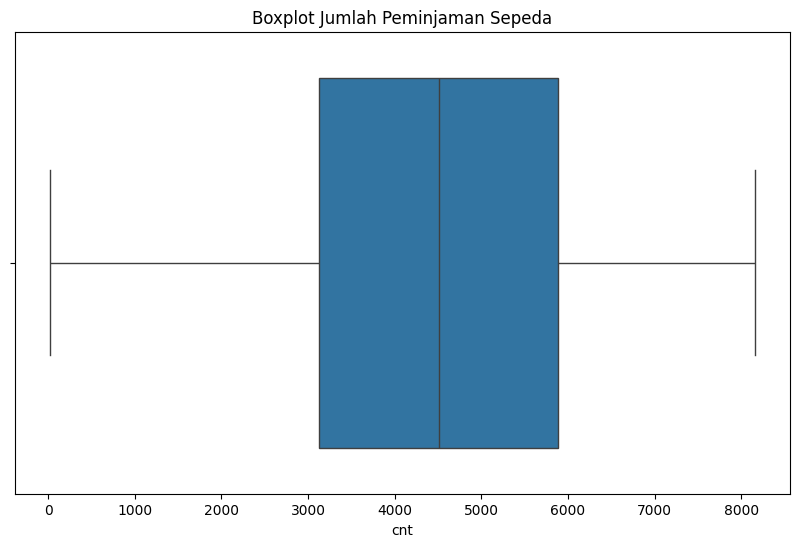

<ipython-input-24-756113c4a70a>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a len

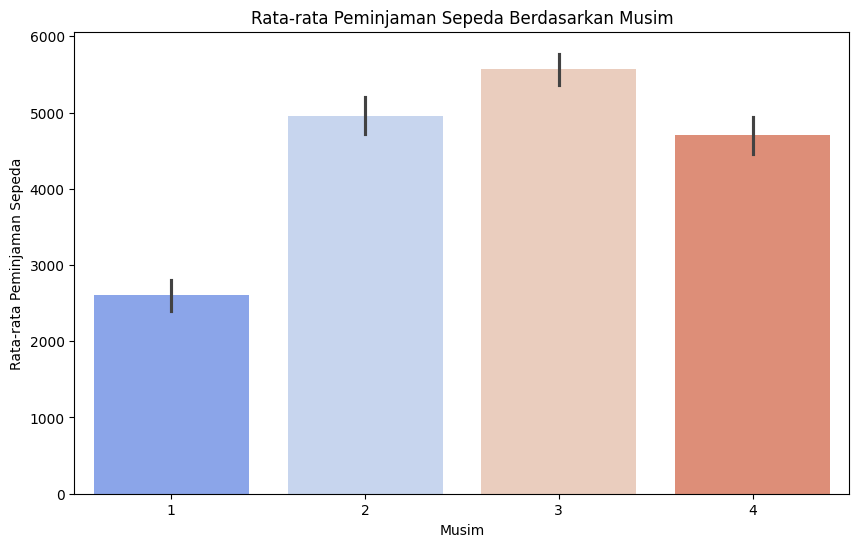

<ipython-input-24-756113c4a70a>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a

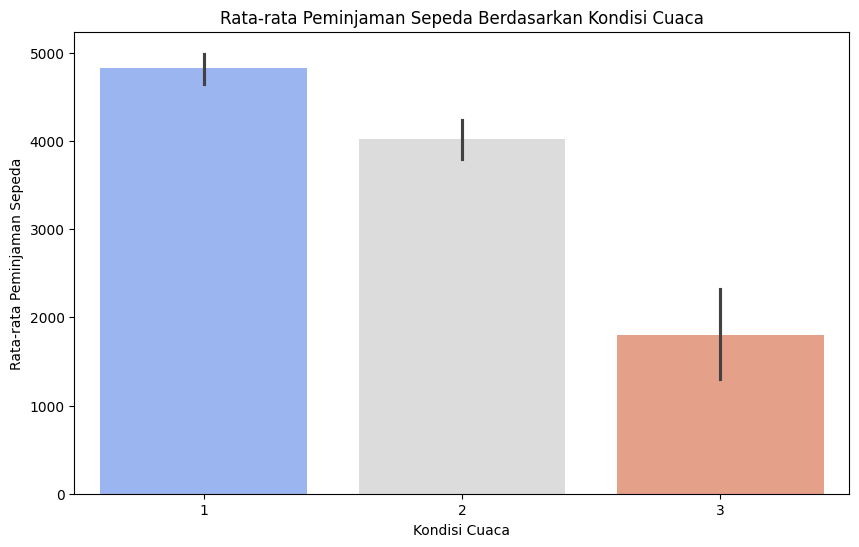

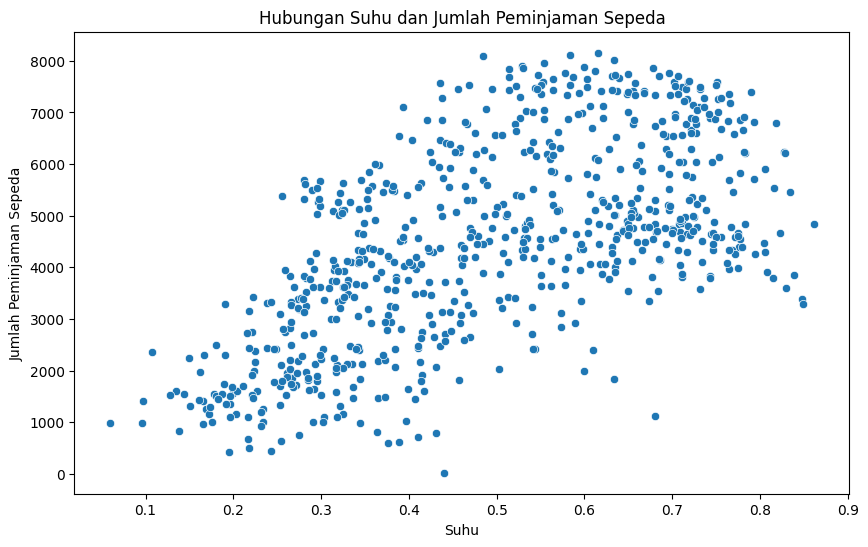

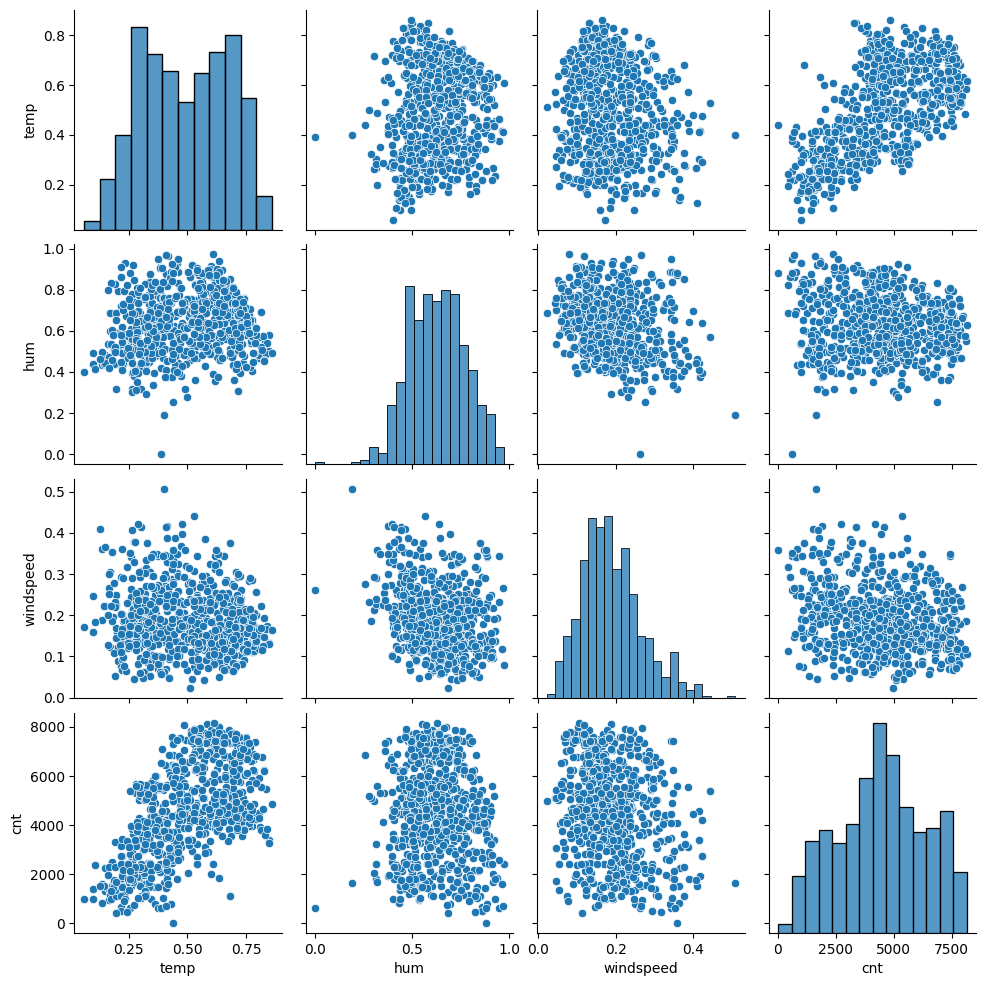

In [24]:
# 1. Statistik Deskriptif
print("Statistik Deskriptif - Dataset Day:")
print(day_df.describe())
print("Statistik Deskriptif - Dataset Hour:")
print(hour_df.describe())

# 2. Distribusi Jumlah Peminjaman Sepeda Harian
plt.figure(figsize=(10,6))
sns.histplot(day_df['cnt'], bins=20, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda (Day Dataset)')
plt.xlabel('Jumlah Peminjaman Sepeda')
plt.ylabel('Frekuensi')
plt.show()

# 3. Distribusi Suhu Harian
plt.figure(figsize=(10,6))
sns.histplot(day_df['temp'], bins=20, kde=True)
plt.title('Distribusi Suhu Harian')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

# 4. Korelasi antara Variabel pada Dataset Day
plt.figure(figsize=(12,8))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Dataset Day')
plt.show()

# 5. Korelasi antara Variabel pada Dataset Hour
plt.figure(figsize=(12,8))
sns.heatmap(hour_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Dataset Hour')
plt.show()

# 6. Tren Jumlah Peminjaman Sepeda Harian
plt.figure(figsize=(12,6))
plt.plot(day_df['dteday'], day_df['cnt'], label='Total Peminjaman', color='b')
plt.title('Tren Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 7. Tren Peminjaman Sepeda Per Jam Berdasarkan Hari Kerja
plt.figure(figsize=(12,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weekday', palette='tab10')
plt.title('Tren Peminjaman Sepeda Per Jam Berdasarkan Hari Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# 8. Boxplot untuk Melihat Outlier dalam Jumlah Peminjaman Sepeda
plt.figure(figsize=(10,6))
sns.boxplot(x=day_df['cnt'])
plt.title('Boxplot Jumlah Peminjaman Sepeda')
plt.show()

# 9. Jumlah Peminjaman Sepeda Berdasarkan Musim
plt.figure(figsize=(10,6))
sns.barplot(x='season', y='cnt', data=day_df, palette='coolwarm')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.show()

# 10. Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit', y='cnt', data=day_df, palette='coolwarm')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.show()

# 11. Hubungan antara Suhu dan Jumlah Peminjaman Sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# 12. Pairplot untuk Melihat Hubungan Antar Variabel Numerik
sns.pairplot(day_df[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

**Insight:**
- Statistik Deskriptif dan Korelasi: Statistik deskriptif memberikan ringkasan tentang kecenderungan sentral, penyebaran, dan bentuk distribusi untuk jumlah penyewaan sepeda dan suhu. Korelasi Heatmap mengungkapkan hubungan antara variabel, menunjukkan bagaimana perubahan suhu, kelembapan, dan kecepatan angin dapat mempengaruhi penyewaan sepeda.
- Tren dan Pola: Line Plot menunjukkan tren penyewaan sepeda harian seiring waktu dan pola berdasarkan jam pada hari kerja, menyoroti waktu penyewaan puncak. Bar Plot mengungkapkan dampak musiman dan cuaca terhadap penyewaan sepeda, menawarkan wawasan yang dapat ditindaklanjuti untuk mengoptimalkan ketersediaan sepeda selama periode permintaan tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

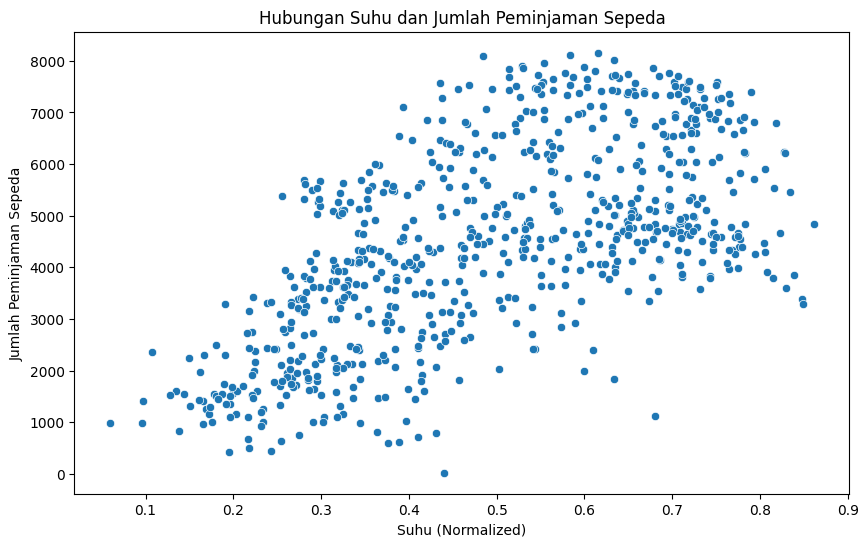

Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda: 0.63


In [25]:
# Visualisasi Scatter Plot antara Suhu dan Jumlah Peminjaman Sepeda
plt.figure(figsize=(10,6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

# Menghitung Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda
correlation = day_df['temp'].corr(day_df['cnt'])
print(f'Koefisien Korelasi antara Suhu dan Jumlah Peminjaman Sepeda: {correlation:.2f}')

### Pertanyaan 2:

<ipython-input-26-171778f3e427>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)


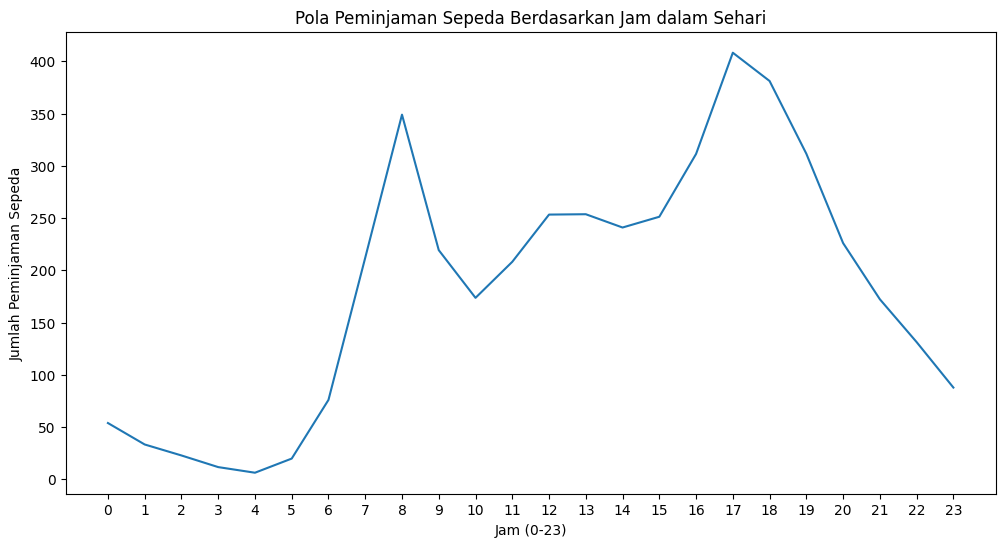

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

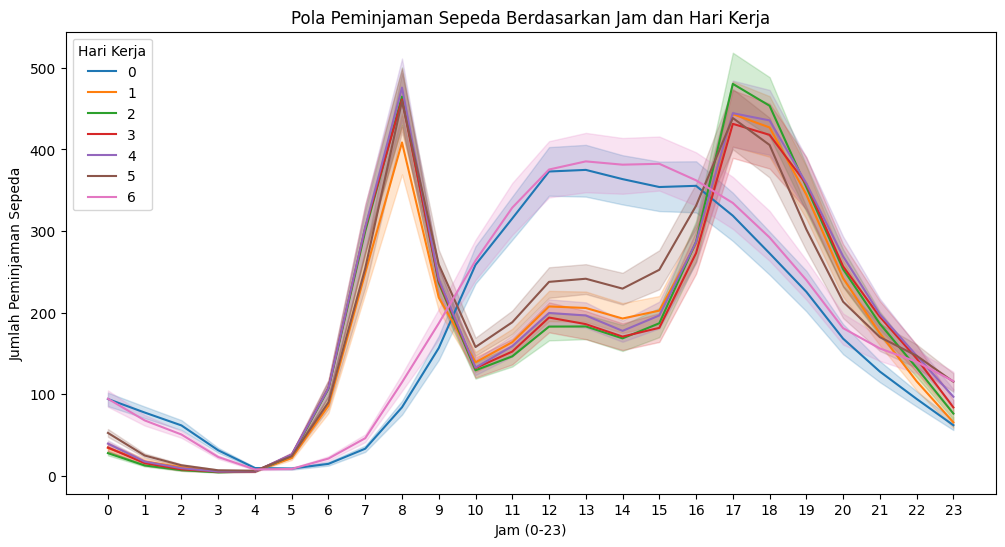

In [26]:
# Visualisasi Pola Peminjaman Sepeda Berdasarkan Jam
plt.figure(figsize=(12,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', ci=None)
plt.title('Pola Peminjaman Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(0, 24))  # Menampilkan setiap jam dari 0 hingga 23
plt.show()

# Menambahkan analisis tambahan untuk melihat pola peminjaman berdasarkan jam dan hari kerja
plt.figure(figsize=(12,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weekday', palette='tab10')
plt.title('Pola Peminjaman Sepeda Berdasarkan Jam dan Hari Kerja')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(0, 24))  # Menampilkan setiap jam dari 0 hingga 23
plt.legend(title='Hari Kerja', loc='upper left')
plt.show()

**Insight:**
- Hubungan antara Suhu dan Penyewaan Sepeda: Scatter Plot menunjukkan korelasi positif yang jelas antara suhu dan jumlah penyewaan sepeda, yang mengisyaratkan bahwa seiring meningkatnya suhu, penyewaan sepeda cenderung meningkat. Koefisien korelasi yang dihitung memperkuat hubungan ini dengan memberikan nilai numerik yang mendukung pengamatan visual.
- Pola Penyewaan Berdasarkan Jam: Line Plot mengungkapkan pola penyewaan sepeda yang jelas sepanjang hari, dengan puncak yang terlihat pada jam-jam tertentu. Dengan menganalisis penyewaan berdasarkan hari dalam seminggu, dapat diidentifikasi tren, seperti permintaan yang lebih tinggi pada akhir pekan atau hari kerja tertentu, yang dapat membantu dalam strategi ketersediaan dan operasional sepeda.

## Analisis Lanjutan (Opsional)

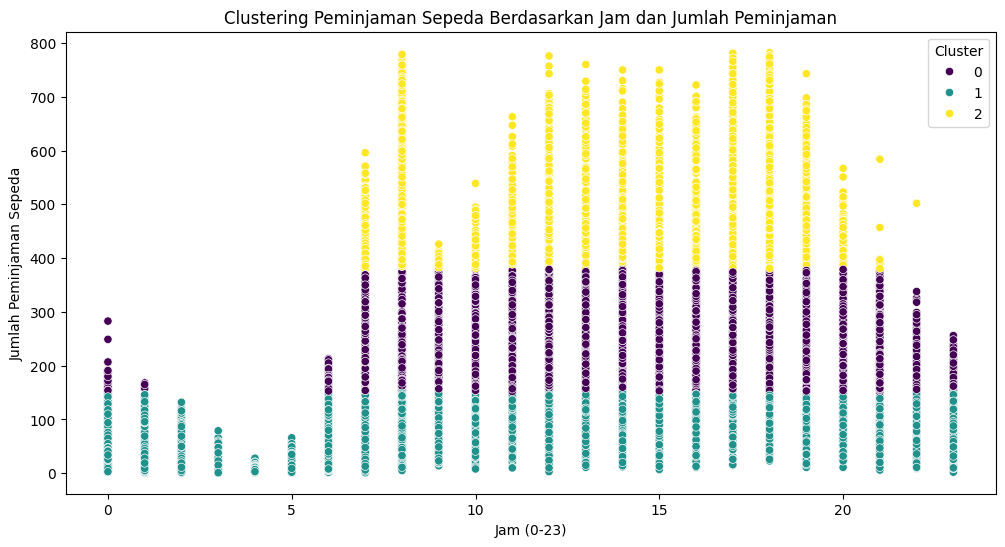

In [27]:
from sklearn.cluster import KMeans

# Mengelompokkan data ke dalam 3 cluster berdasarkan jam dan jumlah peminjaman
kmeans = KMeans(n_clusters=3)
hour_df['cluster'] = kmeans.fit_predict(hour_df[['hr', 'cnt']])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='hr', y='cnt', hue='cluster', palette='viridis', data=hour_df)
plt.title('Clustering Peminjaman Sepeda Berdasarkan Jam dan Jumlah Peminjaman')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.legend(title='Cluster')
plt.show()

## Conclusion

- Pertanyaan 1: Bagaimana hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)? Analisis menunjukkan adanya korelasi positif yang kuat antara suhu dan penyewaan sepeda, yang menunjukkan bahwa suhu yang lebih tinggi menyebabkan peningkatan penggunaan sepeda. Wawasan ini menyarankan bahwa layanan penyewaan sepeda dapat meningkatkan ketersediaan selama cuaca hangat untuk memenuhi permintaan.
- Pertanyaan 2: Apa pola penyewaan sepeda berdasarkan jam dalam sehari?
Investigasi terhadap pola penyewaan sepeda per jam mengungkapkan lonjakan penggunaan yang berbeda sepanjang hari. Memahami tren ini memungkinkan layanan penyewaan untuk mengoptimalkan distribusi sepeda dan penempatan staf selama jam-jam puncak, memastikan pelayanan yang lebih baik dan kepuasan pelanggan.